In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
item_category = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
train = pd.read_csv("sales_train.csv", parse_dates = ['date'],infer_datetime_format= True , dayfirst= True)
shops = pd.read_csv("shops.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0


In [53]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [54]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [55]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [58]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [21]:
x = items.groupby(['item_category_id']).count()
x = x.reset_index()
x

,item_category_id,item_name,item_id
0,0,4,4
1,1,2,2
2,2,75,75
3,3,34,34
4,4,15,15
...,...,...,...
79,79,1,1
80,80,6,6
81,81,7,7
82,82,8,8


In [38]:
x = items.groupby(['item_category_id']).sum()
x = x.reset_index()
x.head()


(22170, 3)

1780


c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


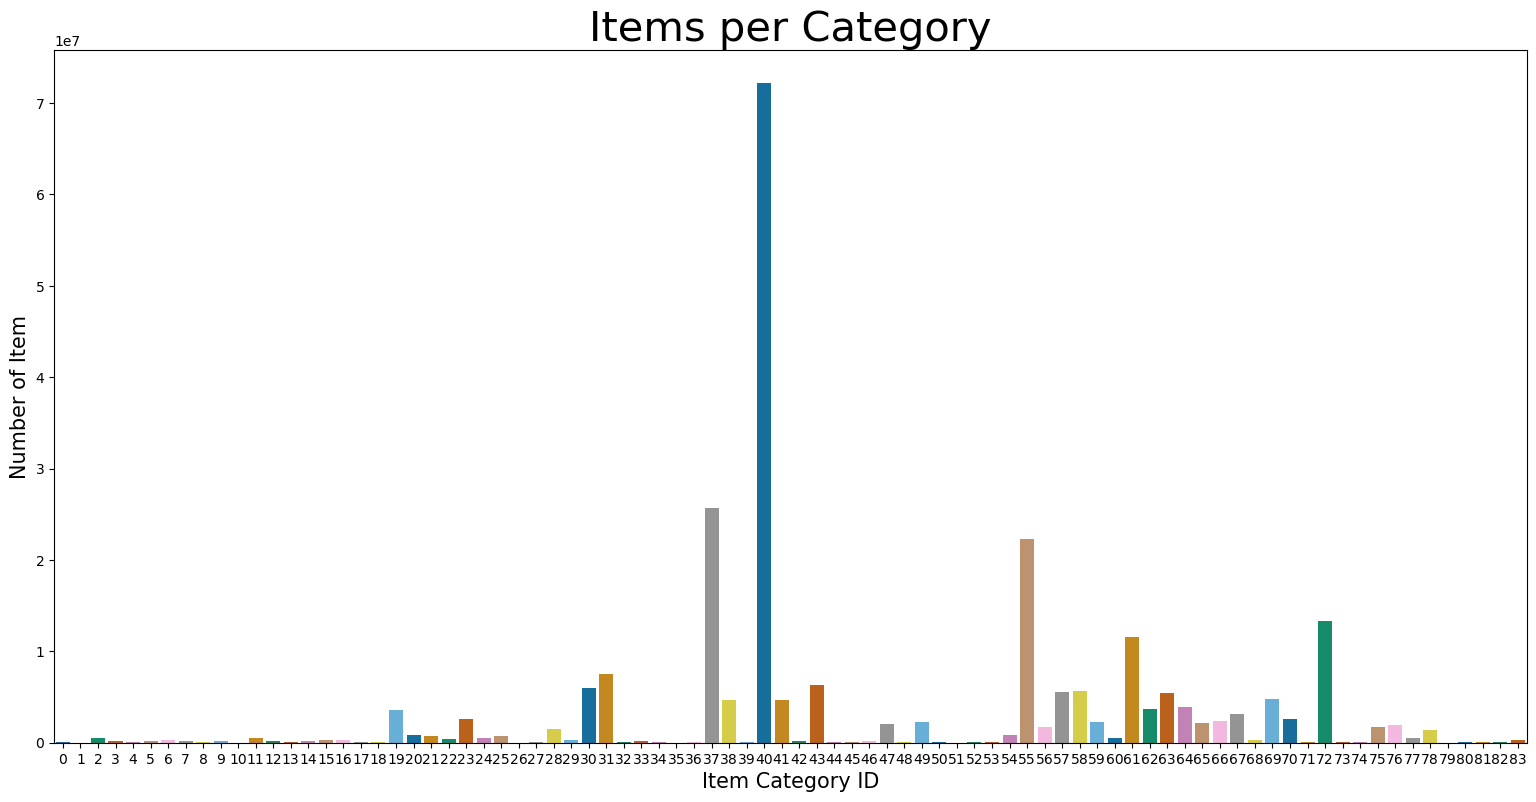

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


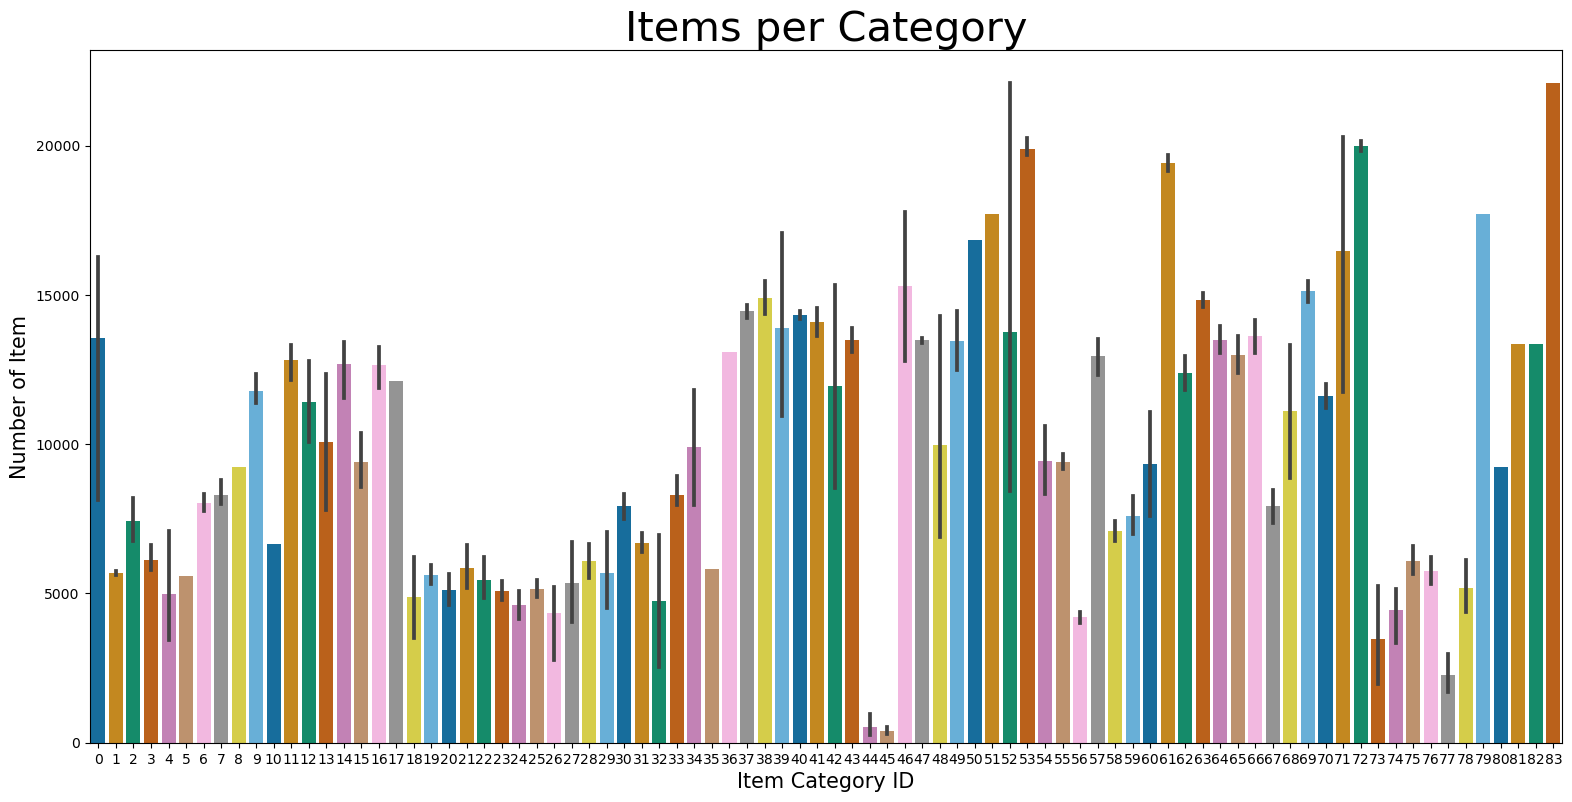

In [28]:
plt.rcParams['figure.figsize'] = (19, 9)
#sns.barplot(x.item_category_id, x.item_name , palette='colorblind')
sns.barplot(items['item_category_id'], items['item_id'], palette = 'colorblind')
plt.title("Items per Category",fontsize = 30)
plt.xlabel("Item Category ID", fontsize =15)
plt.ylabel("Number of Item", fontsize =15)
plt.show()

In [56]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


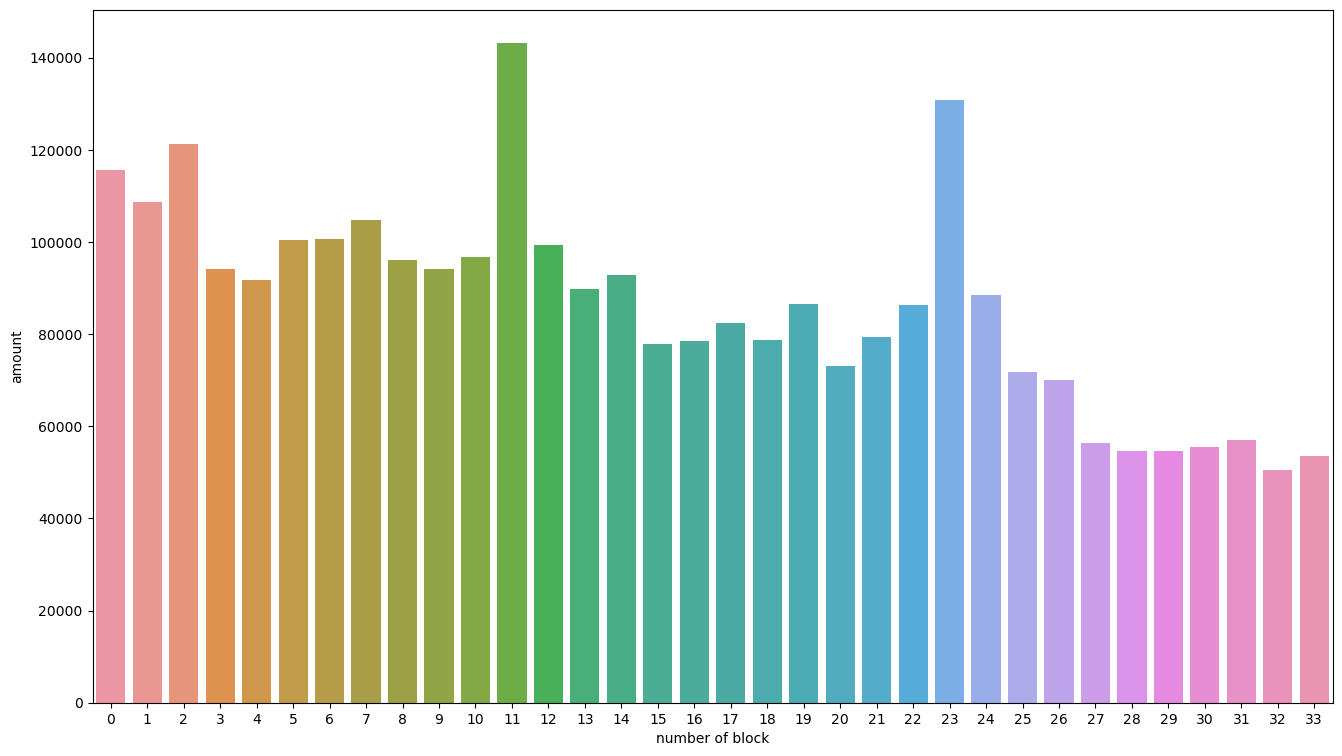

In [57]:
plt.figure(figsize = (16,9))
sns.countplot(train['date_block_num'])
plt.title("")
plt.xlabel("number of block")
plt.ylabel("amount")
plt.show()

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


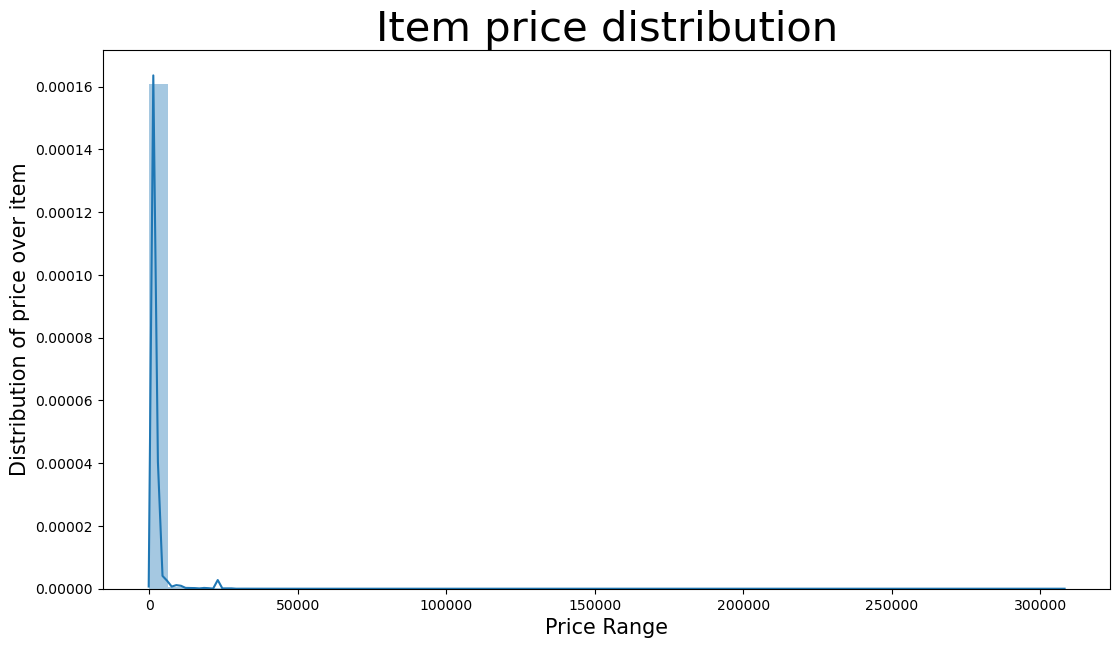

In [64]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.distplot(train['item_price'])
plt.title("Item price distribution", fontsize = 30)
plt.xlabel("Price Range", fontsize = 15)
plt.ylabel("Distribution of price over item", fontsize = 15)
plt.show()

In [66]:
test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


c:\Users\edmun\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Distribution per day')

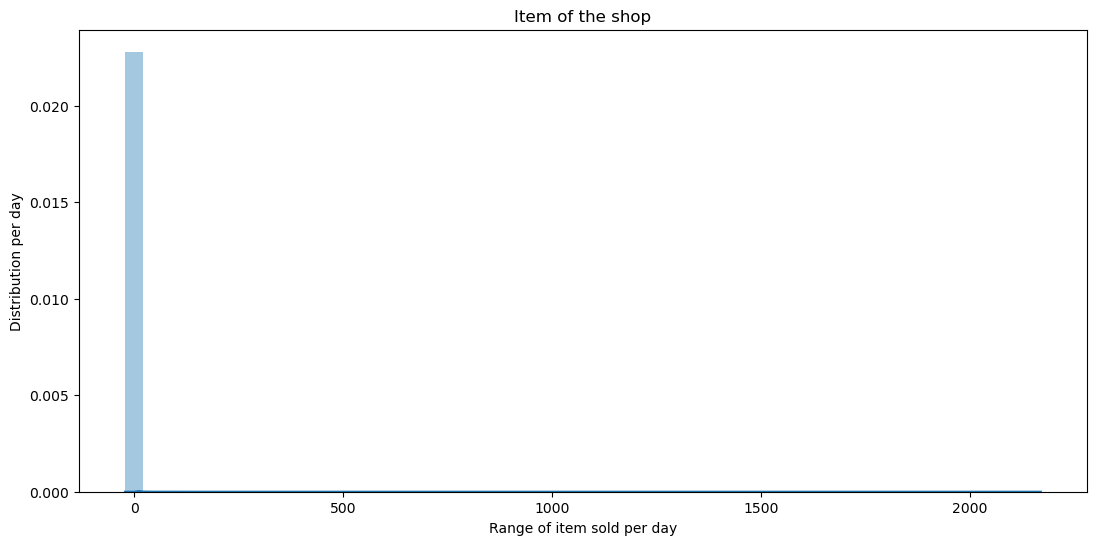

In [72]:

plt.figure(figsize = (13,6))
sns.distplot(train['item_cnt_day'])
plt.title("Item of the shop")
plt.xlabel("Range of item sold per day")
plt.ylabel("Distribution per day")


In [73]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [74]:
# making a new column day
train['day'] = train['date'].dt.day

# making a new column month
train['month'] = train['date'].dt.month

# making a new column year
train['year'] = train['date'].dt.year

# making a new column week
train['week'] = train['date'].dt.week

# checking the new columns
train.columns

C:\Users\edmun\AppData\Local\Temp\ipykernel_21588\3888714929.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week'] = train['date'].dt.week


Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'day', 'month', 'year', 'week'],
      dtype='object')

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Days')

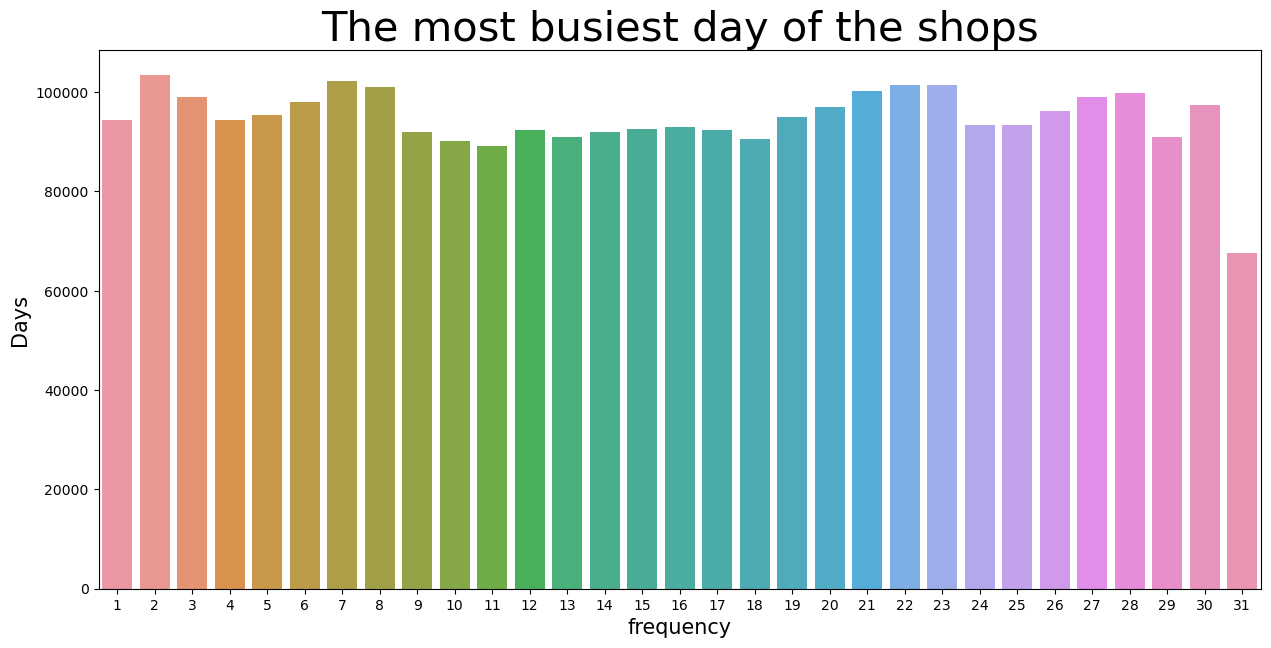

In [75]:
plt.figure(figsize=(15,7))
sns.countplot(train['day'])
plt.title("The most busiest day of the shops",fontsize = 30)
plt.xlabel("frequency",fontsize = 15)
plt.ylabel("Days",fontsize = 15)

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Months')

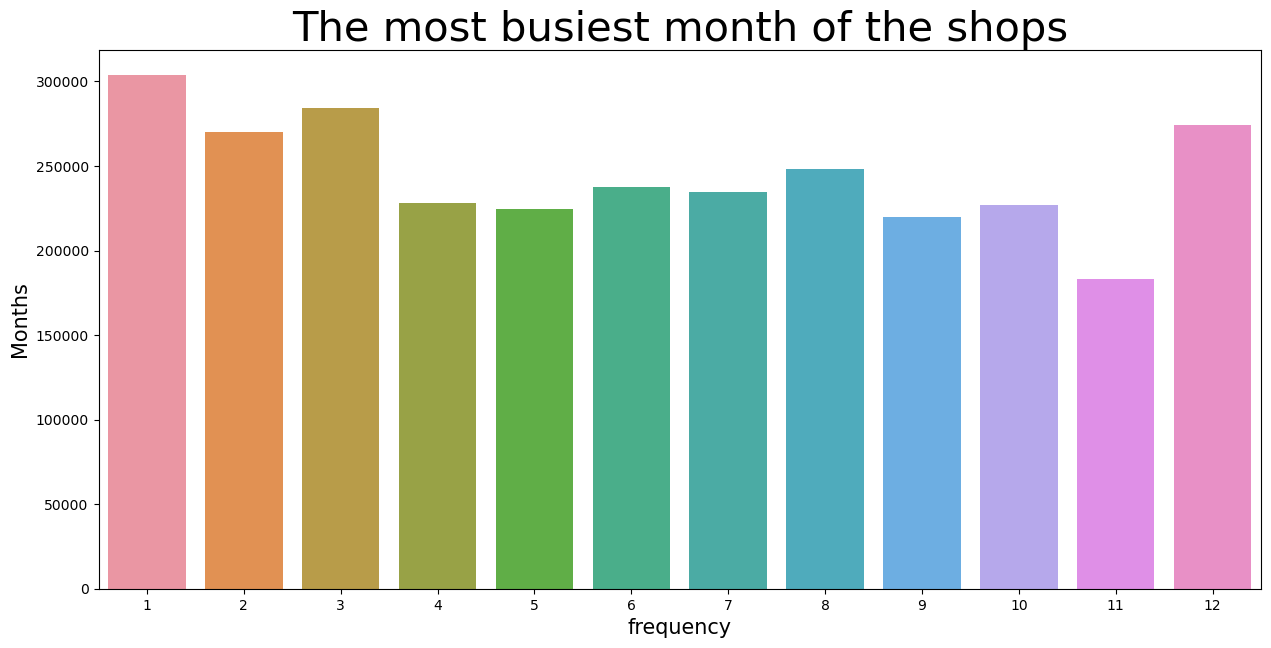

In [76]:
plt.figure(figsize=(15,7))
sns.countplot(train['month'])
plt.title("The most busiest month of the shops",fontsize = 30)
plt.xlabel("frequency",fontsize = 15)
plt.ylabel("Months",fontsize = 15)

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Year')

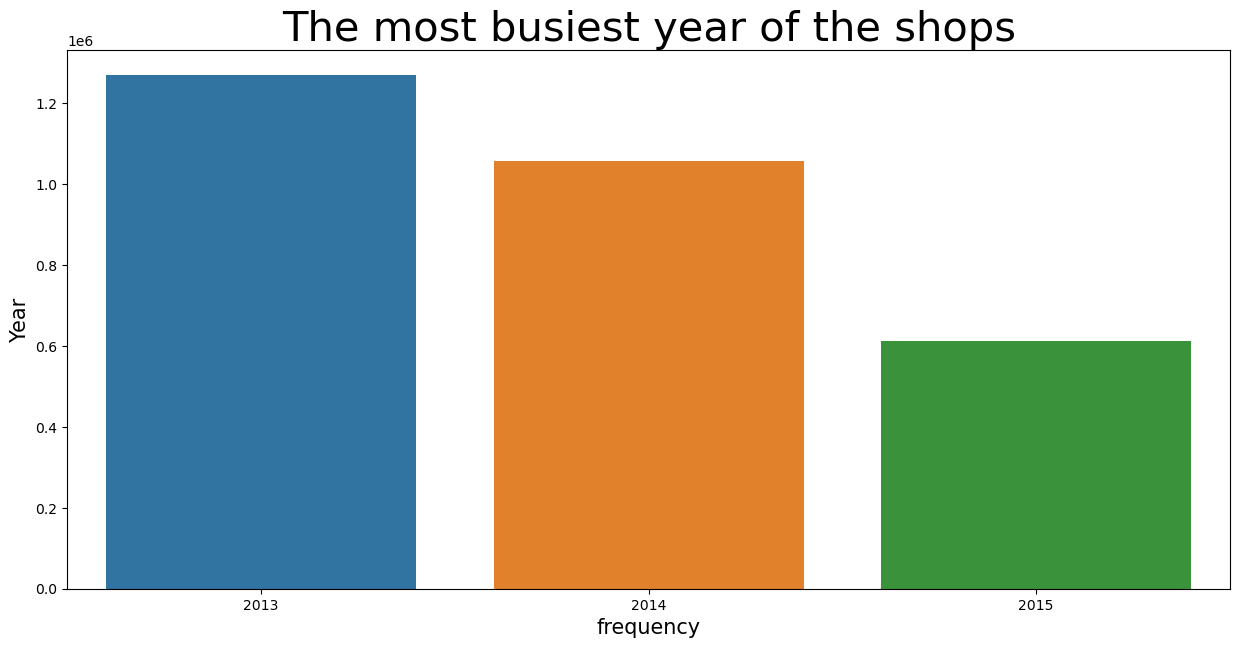

In [77]:
plt.figure(figsize=(15,7))
sns.countplot(train['year'])
plt.title("The most busiest year of the shops",fontsize = 30)
plt.xlabel("frequency",fontsize = 15)
plt.ylabel("Year",fontsize = 15)

c:\Users\edmun\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


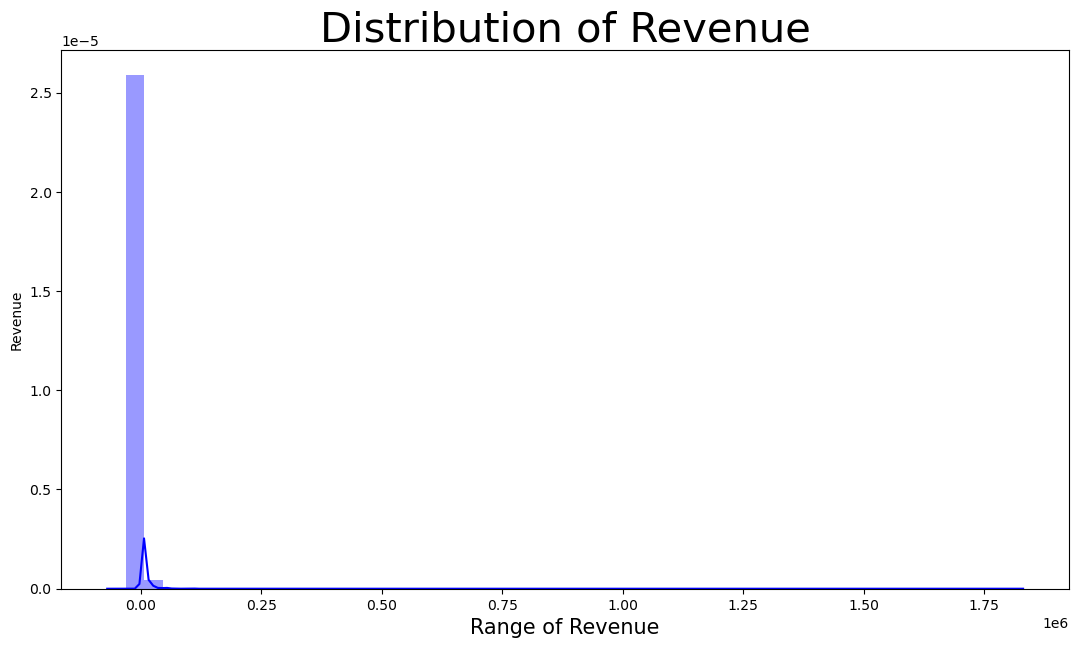

In [80]:
train['revenue'] = train['item_price'] * train['item_cnt_day']

sns.distplot(train['revenue'], color = 'blue')
plt.title('Distribution of Revenue', fontsize = 30)
plt.xlabel('Range of Revenue', fontsize = 15)
plt.ylabel('Revenue')
plt.show()

In [81]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,week,revenue
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,1,999.00
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,1,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,1,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,1,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,3,1099.00
...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,10,10,2015,41,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,9,10,2015,41,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,14,10,2015,42,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,22,10,2015,43,299.00


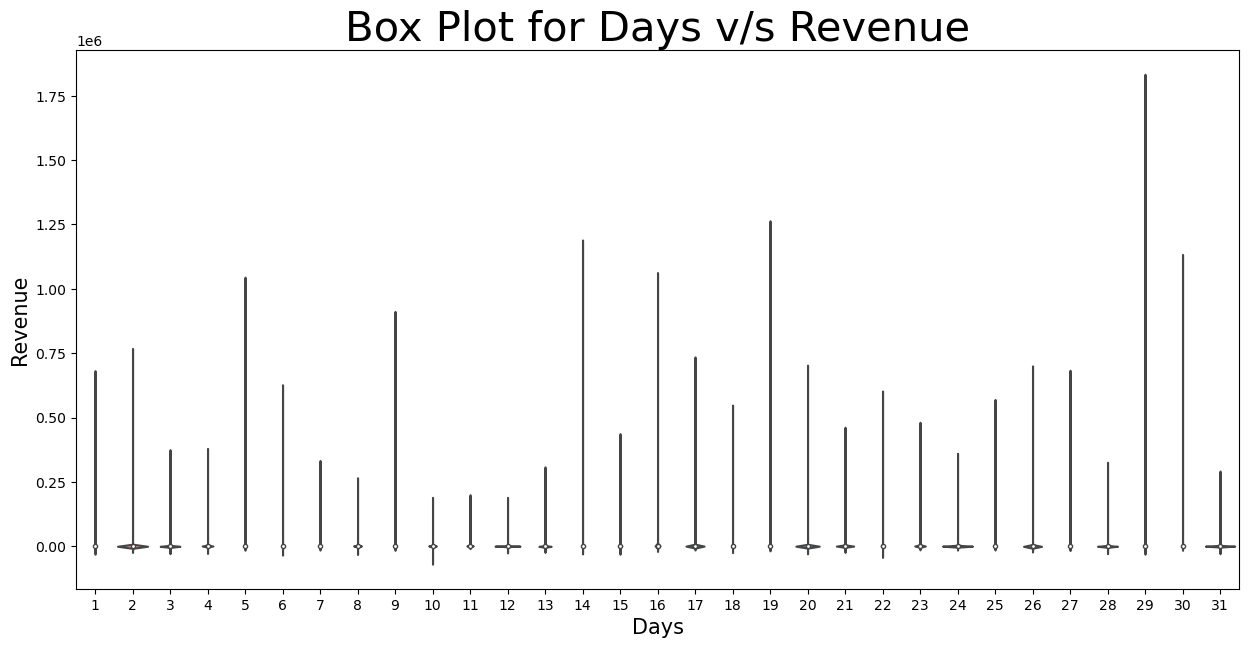

In [82]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.violinplot(x = train['day'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

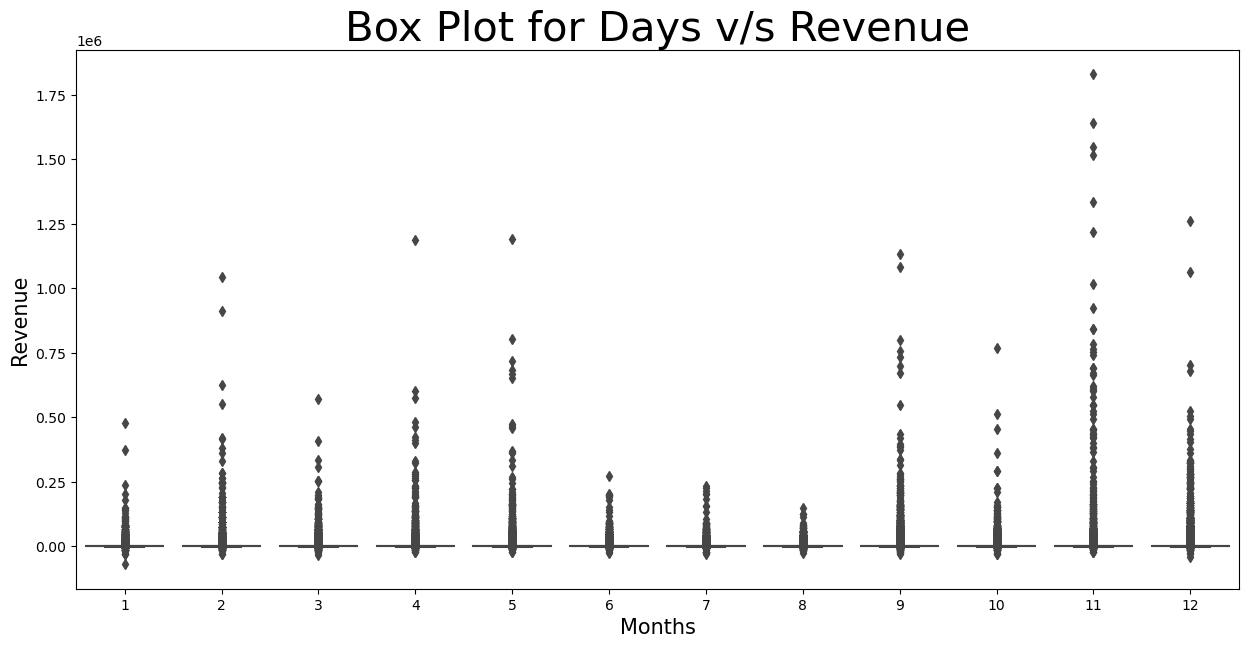

In [83]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.boxplot(x = train['month'], y = train['revenue'])
plt.title('Box Plot for Days v/s Revenue', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2]))
reg = LinearRegression().fit(X,y)


In [22]:
y

array([6, 6, 7, 9])

In [40]:
all = ['Year_Factor',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog',
 'site_eui',
 'id',
 'age']


In [41]:
num_nontemp = ['Year_Factor',
 'floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'days_above_80F',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'direction_max_wind_speed',
 'direction_peak_wind_speed',
 'max_wind_speed',
 'days_with_fog',
 'age',
 'site_eui']

In [46]:
num_temp = []
for i in all:
    if i not in num_nontemp:
        num_temp.append(i)

In [47]:
num_temp

['january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'id']